In [1]:
library(XLConnect)

Loading required package: XLConnectJars
XLConnect 0.2-13 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)
http://www.mirai-solutions.com ,
http://miraisolutions.wordpress.com


In [2]:
importWorksheets <- function(filename){
    #filename: name of Excel file
    #https://stackoverflow.com/questions/12945687/read-all-worksheets-in-an-excel-workbook-into-an-r-list-with-data-frames
    workbook <- loadWorkbook(filename)
    sheetNames <- getSheets(workbook)
    names(sheetNames) <- sheetNames
    sheetList <- lapply(sheetNames, function(.sheet){
        readWorksheet(object= workbook, .sheet)
    }
  )                   
}

In [3]:
dictionarySheets <- importWorksheets('zillow_data_dictionary.xlsx')

In [4]:
summary(dictionarySheets)

                         Length Class      Mode
Data Dictionary          2      data.frame list
HeatingOrSystemTypeID    2      data.frame list
PropertyLandUseTypeID    2      data.frame list
StoryTypeID              2      data.frame list
AirConditioningTypeID    2      data.frame list
ArchitecturalStyleTypeID 2      data.frame list
TypeConstructionTypeID   2      data.frame list
BuildingClassTypeID      2      data.frame list

In [5]:
getwd()

[1] "/home/avanti/Python101/kaggle/zillow"

In [6]:
trainSet <- read.table("train_2016.csv", header = TRUE, sep = ",")

In [7]:
propertiesSet <- read.table("properties_2016.csv", header = TRUE, sep = ',', fill = TRUE, na.strings = "NA")

In [8]:
summary(trainSet)

    parcelid            logerror          transactiondate 
 Min.   : 10711738   Min.   :-4.60500   2016-04-29:  917  
 1st Qu.: 11564405   1st Qu.:-0.02630   2016-07-29:  912  
 Median : 12553718   Median : 0.00500   2016-09-30:  900  
 Mean   : 12993598   Mean   : 0.01082   2016-06-30:  878  
 3rd Qu.: 14237199   3rd Qu.: 0.03920   2016-05-27:  876  
 Max.   :162960842   Max.   : 4.73700   2016-08-31:  740  
                                        (Other)   :85588  

In [9]:
summary(propertiesSet)

    parcelid         airconditioningtypeid architecturalstyletypeid
 Min.   : 10711725   Min.   : 1.0          Min.   : 2.0            
 1st Qu.: 11643707   1st Qu.: 1.0          1st Qu.: 7.0            
 Median : 12545094   Median : 1.0          Median : 7.0            
 Mean   : 13325858   Mean   : 1.9          Mean   : 7.2            
 3rd Qu.: 14097122   3rd Qu.: 1.0          3rd Qu.: 7.0            
 Max.   :169601949   Max.   :13.0          Max.   :27.0            
                     NA's   :2173698       NA's   :2979156         
  basementsqft      bathroomcnt       bedroomcnt     buildingclasstypeid
 Min.   :  20.0    Min.   : 0.000   Min.   : 0.000   Min.   :1.0        
 1st Qu.: 272.0    1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.:3.0        
 Median : 534.0    Median : 2.000   Median : 3.000   Median :4.0        
 Mean   : 646.9    Mean   : 2.209   Mean   : 3.089   Mean   :3.7        
 3rd Qu.: 847.2    3rd Qu.: 3.000   3rd Qu.: 4.000   3rd Qu.:4.0        
 Max.   :8516.0   

In [10]:
parcelID <- trainSet["parcelid"]

In [11]:
propertiesTrain <- merge(trainSet, propertiesSet, by = c('parcelid', 'parcelid') )

In [12]:
summary(propertiesTrain)

    parcelid            logerror          transactiondate 
 Min.   : 10711738   Min.   :-4.60500   2016-04-29:  917  
 1st Qu.: 11564405   1st Qu.:-0.02630   2016-07-29:  912  
 Median : 12553718   Median : 0.00500   2016-09-30:  900  
 Mean   : 12993598   Mean   : 0.01082   2016-06-30:  878  
 3rd Qu.: 14237199   3rd Qu.: 0.03920   2016-05-27:  876  
 Max.   :162960842   Max.   : 4.73700   2016-08-31:  740  
                                        (Other)   :85588  
 airconditioningtypeid architecturalstyletypeid  basementsqft   
 Min.   : 1.00         Min.   : 2.00            Min.   : 100.0  
 1st Qu.: 1.00         1st Qu.: 7.00            1st Qu.: 407.5  
 Median : 1.00         Median : 7.00            Median : 616.0  
 Mean   : 1.82         Mean   : 7.23            Mean   : 713.6  
 3rd Qu.: 1.00         3rd Qu.: 7.00            3rd Qu.: 872.0  
 Max.   :13.00         Max.   :21.00            Max.   :1555.0  
 NA's   :62030         NA's   :90550            NA's   :90768   
  bathro

In [13]:
na_count <- data.frame(sapply(propertiesTrain, function(y) sum((is.na(y)))))

In [14]:
na_count

,sapply.propertiesTrain..function.y..sum..is.na.y....
parcelid,0
logerror,0
transactiondate,0
airconditioningtypeid,62030
architecturalstyletypeid,90550
basementsqft,90768
bathroomcnt,536
bedroomcnt,536
buildingclasstypeid,90795
buildingqualitytypeid,33447


In [15]:
dictionarySheets[[4]]

StoryTypeID,StoryDesc
1,Attic & Basement
2,Attic
3,Bi-Level with Attic & Basement
4,Bi-Level
5,Bi-Level with Attic
6,Bi-Level with Basement
7,Basement
8,Split Entry with Attic & Basement
9,Split Foyer with Attic & Basement
10,Level with Attic & Basement


In [16]:
sum(is.na(propertiesTrain$storytypeid))

[1] 90768

In [17]:
sum(is.na(propertiesTrain$numberofstories))

[1] 70241

In [18]:
sum(is.na(propertiesTrain$basementsqft))

[1] 90768

In [19]:
sum(is.na(propertiesTrain$storytypeid) & is.na(propertiesTrain$basementsqft))

[1] 90768

In [20]:
sum(is.na(propertiesTrain$storytypeid) & is.na(propertiesTrain$numberofstories))

[1] 70241

In [21]:
library(broom)

In [22]:
tidy(summary(propertiesTrain))

Var1,Var2,Freq
,parcelid,Min. : 10711738
,parcelid,1st Qu.: 11564405
,parcelid,Median : 12553718
,parcelid,Mean : 12993598
,parcelid,3rd Qu.: 14237199
,parcelid,Max. :162960842
,parcelid,NA
,logerror,Min. :-4.60500
,logerror,1st Qu.:-0.02630
,logerror,Median : 0.00500


In [23]:
dfSummary <- as.data.frame(unclass(summary(propertiesTrain)))

In [24]:
dfSummary

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,⋯,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
,Min. : 10711738,Min. :-4.60500,2016-04-29: 917,Min. : 1.00,Min. : 2.00,Min. : 100.0,Min. : 0.00,Min. : 0.000,Min. :4,Min. : 1.00,⋯,Min. :1.00,:90589,Min. : 100,Min. : 22,Min. :2015,Min. : 22,Min. : 49.1,:89028,Min. : 6.0,Min. :6.037e+13
,1st Qu.: 11564405,1st Qu.:-0.02630,2016-07-29: 912,1st Qu.: 1.00,1st Qu.: 7.00,1st Qu.: 407.5,1st Qu.: 2.00,1st Qu.: 2.000,1st Qu.:4,1st Qu.: 4.00,⋯,1st Qu.:1.00,true: 222,1st Qu.: 81245,1st Qu.: 199024,1st Qu.:2015,1st Qu.: 82228,1st Qu.: 2872.9,Y: 1783,1st Qu.:13.0,1st Qu.:6.037e+13
,Median : 12553718,Median : 0.00500,2016-09-30: 900,Median : 1.00,Median : 7.00,Median : 616.0,Median : 2.00,Median : 3.000,Median :4,Median : 7.00,⋯,Median :1.00,NA,Median : 132000,Median : 342872,Median :2015,Median : 192980,Median : 4542.8,NA,Median :14.0,Median :6.038e+13
,Mean : 12993598,Mean : 0.01082,2016-06-30: 878,Mean : 1.82,Mean : 7.23,Mean : 713.6,Mean : 2.28,Mean : 3.032,Mean :4,Mean : 5.57,⋯,Mean :1.44,NA,Mean : 180095,Mean : 457677,Mean :2015,Mean : 278338,Mean : 5984.0,NA,Mean :13.4,Mean :6.049e+13
,3rd Qu.: 14237199,3rd Qu.: 0.03920,2016-05-27: 876,3rd Qu.: 1.00,3rd Qu.: 7.00,3rd Qu.: 872.0,3rd Qu.: 3.00,3rd Qu.: 4.000,3rd Qu.:4,3rd Qu.: 7.00,⋯,3rd Qu.:2.00,NA,3rd Qu.: 210535,3rd Qu.: 540589,3rd Qu.:2015,3rd Qu.: 345424,3rd Qu.: 6901.1,NA,3rd Qu.:15.0,3rd Qu.:6.059e+13
,Max. :162960842,Max. : 4.73700,2016-08-31: 740,Max. :13.00,Max. :21.00,Max. :1555.0,Max. :20.00,Max. :16.000,Max. :4,Max. :12.00,⋯,Max. :4.00,NA,Max. :9948100,Max. :27750000,Max. :2015,Max. :24500000,Max. :321936.1,NA,Max. :99.0,Max. :6.111e+13
,NA,NA,(Other) :85588,NA's :62030,NA's :90550,NA's :90768,NA's :536,NA's :536,NA's :90795,NA's :33447,⋯,NA's :70241,NA,NA's :917,NA's :538,NA's :537,NA's :538,NA's :543,NA,NA's :89028,NA's :1142


In [25]:
filterTrain <- propertiesTrain[sapply(propertiesTrain, 
                       function(x) min(as.numeric(x), na.rm = TRUE)
                           != max(as.numeric(x), na.rm = TRUE))]

In [26]:
summary(filterTrain)

    parcelid            logerror          transactiondate 
 Min.   : 10711738   Min.   :-4.60500   2016-04-29:  917  
 1st Qu.: 11564405   1st Qu.:-0.02630   2016-07-29:  912  
 Median : 12553718   Median : 0.00500   2016-09-30:  900  
 Mean   : 12993598   Mean   : 0.01082   2016-06-30:  878  
 3rd Qu.: 14237199   3rd Qu.: 0.03920   2016-05-27:  876  
 Max.   :162960842   Max.   : 4.73700   2016-08-31:  740  
                                        (Other)   :85588  
 airconditioningtypeid architecturalstyletypeid  basementsqft   
 Min.   : 1.00         Min.   : 2.00            Min.   : 100.0  
 1st Qu.: 1.00         1st Qu.: 7.00            1st Qu.: 407.5  
 Median : 1.00         Median : 7.00            Median : 616.0  
 Mean   : 1.82         Mean   : 7.23            Mean   : 713.6  
 3rd Qu.: 1.00         3rd Qu.: 7.00            3rd Qu.: 872.0  
 Max.   :13.00         Max.   :21.00            Max.   :1555.0  
 NA's   :62030         NA's   :90550            NA's   :90768   
  bathro

In [27]:
length(propertiesTrain)

[1] 60

In [28]:
length(filterTrain)

[1] 52

In [29]:
library(ggplot2)

In [30]:
library(plyr)

In [31]:
filterCount <- data.frame(sapply(filterTrain, function(y) sum((!is.na(y)))))

In [32]:
filterCount

,sapply.filterTrain..function.y..sum...is.na.y....
parcelid,90811
logerror,90811
transactiondate,90811
airconditioningtypeid,28781
architecturalstyletypeid,261
basementsqft,43
bathroomcnt,90275
bedroomcnt,90275
buildingqualitytypeid,57364
calculatedbathnbr,89093


In [33]:
library(purrr)


Attaching package: ‘purrr’

The following object is masked from ‘package:plyr’:

    compact



In [34]:
missingData <- sapply(propertiesTrain, 
                       function(x) {round((sum(is.na(x))/length(x)) * 100, 1)})

In [35]:
missingData <- missingData[missingData >0]

In [36]:
head(missingData)

airconditioningtypeid architecturalstyletypeid             basementsqft 
                    68.3                     99.7                    100.0 
             bathroomcnt               bedroomcnt      buildingclasstypeid 
                     0.6                      0.6                    100.0

In [37]:
summary(missingData)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.60    0.60   49.25   48.01   97.32  100.00 

In [38]:
data.frame(missing = missingData, var = (missingData), row.names = NULL)

missing,var
68.3,68.3
99.7,99.7
100.0,100.0
0.6,0.6
0.6,0.6
100.0,100.0
36.8,36.8
1.9,1.9
99.3,99.3
92.5,92.5


In [39]:
plot1 <-
    data.frame(miss = missingData, var = names(missingData), row.names = NULL) %>%
    ggplot(aes(x = reorder(var, -missingData), y = missingData )) +
    geom_bar(stat='identity', fill = 'blue' ) +
    labs(x = '', y = '%missing', title = 'Percent data missing by feature') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
    

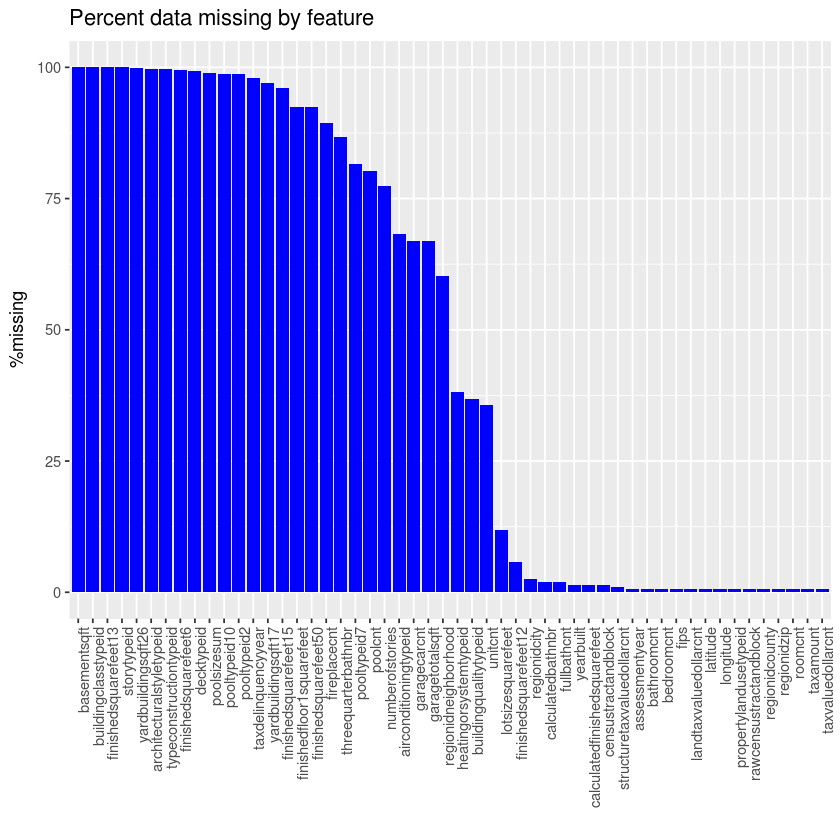

In [40]:
plot1

In [41]:
meanData <- sapply(propertiesTrain, 
                       function(x) mean(as.numeric(x), na.rm = TRUE))


In [42]:
varData <- sapply(propertiesTrain, function(x) sd(as.numeric(x), na.rm = TRUE))

In [43]:
data.frame(meanData, varData)

,meanData,varData
parcelid,1.299360e+07,2.504000e+06
logerror,1.081647e-02,1.632876e-01
transactiondate,1.606777e+02,8.376427e+01
airconditioningtypeid,1.816372e+00,2.974168e+00
architecturalstyletypeid,7.229885e+00,2.716196e+00
basementsqft,7.135814e+02,4.374342e+02
bathroomcnt,2.279474e+00,1.004271e+00
bedroomcnt,3.031869e+00,1.156436e+00
buildingclasstypeid,4.000000e+00,0.000000e+00
buildingqualitytypeid,5.565407e+00,1.900602e+00


In [44]:
CV <- function(mean, sd){
    (sd/mean) *100
    }

In [45]:
cvData <- CV(meanData, varData)

In [46]:
data.frame(cv= cvData[-2], var = cvData[-2],row.names = NULL)

cv,var
19.2710265,19.2710265
52.1318575,52.1318575
163.7422339,163.7422339
37.5690019,37.5690019
61.3012336,61.3012336
44.0571405,44.0571405
38.1426575,38.1426575
0.0000000,0.0000000
34.1502728,34.1502728
42.2728930,42.2728930


In [47]:
plot2 <-
    data.frame(cv = cvData[-2], var = names(cvData[-2]), row.names = NULL) %>%
    ggplot(aes(x = reorder(var, -cv), y = cv )) +
    geom_bar(stat='identity', fill = 'blue' ) +
    labs(x = '', y = '% Relative Variability (SD / Mean)', title = 'Variability by feature') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
    

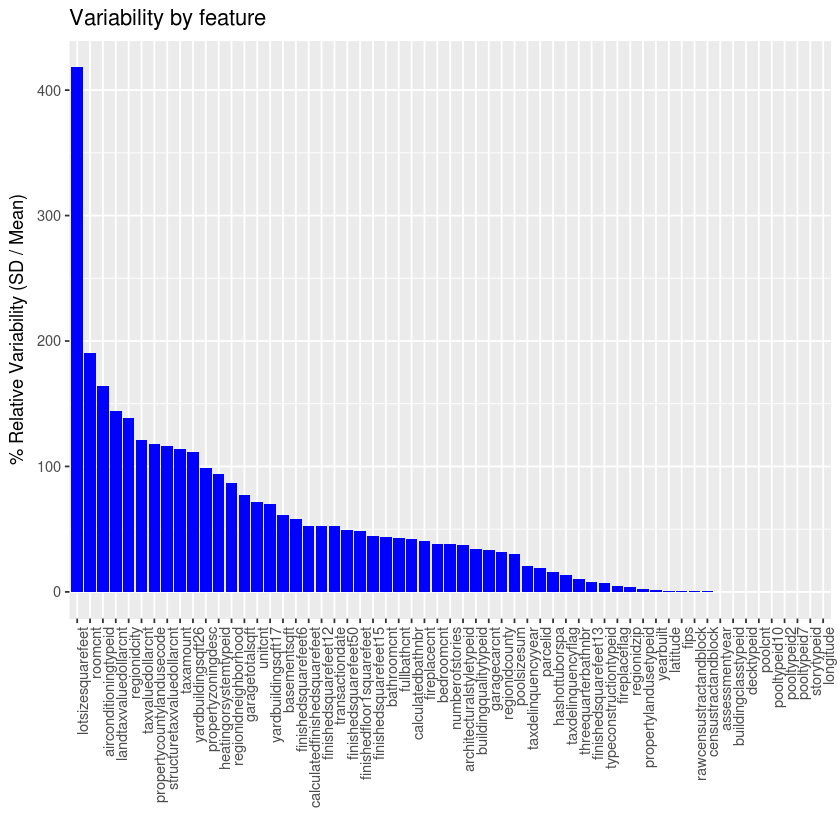

In [48]:
plot2

In [49]:
filterTrain <- propertiesTrain[varData != 0.000]

In [50]:
dim(filterTrain)

[1] 90811    52

In [51]:
cvData <- cvData[varData != 0.0000]

In [52]:
dim(cvData)

NULL

In [53]:
cvData <- CV(meanData, varData)

In [54]:
cvData

parcelid                     logerror 
                  19.2710265                 1509.6199180 
             transactiondate        airconditioningtypeid 
                  52.1318575                  163.7422339 
    architecturalstyletypeid                 basementsqft 
                  37.5690019                   61.3012336 
                 bathroomcnt                   bedroomcnt 
                  44.0571405                   38.1426575 
         buildingclasstypeid        buildingqualitytypeid 
                   0.0000000                   34.1502728 
           calculatedbathnbr                   decktypeid 
                  42.2728930                    0.0000000 
    finishedfloor1squarefeet calculatedfinishedsquarefeet 
                  48.3984860                   52.3443339 
        finishedsquarefeet12         finishedsquarefeet13 
                  52.1320464                    7.8394196 
        finishedsquarefeet15         finishedsquarefeet50 
                  44.8809562                   49.6997632 
         finishedsquarefeet6                         fips 
                  58.4681069                    0.3416086 
                fireplacecnt                  fullbathcnt 
                  40.7592668                   42.9737760 
                garagecarcnt              garagetotalsqft 
                  33.5959615                   77.2791645 
              hashottuborspa        heatingorsystemtypeid 
                  15.5221902                   93.8222933 
                    latitude                    longitude 
                   0.7791859                   -0.3050818 
           lotsizesquarefeet                      poolcnt 
                 418.1402342                    0.0000000 
                 poolsizesum                 pooltypeid10 
                  29.8280032                    0.0000000 
                 pooltypeid2                  pooltypeid7 
                   0.0000000                    0.0000000 
   propertycountylandusecode        propertylandusetypeid 
                 117.7838940                    1.9794742 
          propertyzoningdesc       rawcensustractandblock 
                  98.8381021                    0.3389809 
                regionidcity               regionidcounty 
                 138.2413434                   31.9035573 
        regionidneighborhood                  regionidzip 
                  87.1921989                    3.7907708 
                     roomcnt                  storytypeid 
                 190.7052617                    0.0000000 
         threequarterbathnbr       typeconstructiontypeid 
                   9.9956179                    7.2750789 
                     unitcnt           yardbuildingsqft17 
                  71.7966865                   69.8782487 
          yardbuildingsqft26                    yearbuilt 
                 111.1198906                    1.2071697 
             numberofstories                fireplaceflag 
                  37.7929778                    4.9262648 
  structuretaxvaluedollarcnt            taxvaluedollarcnt 
                 116.1220035                  121.2394232 
              assessmentyear        landtaxvaluedollarcnt 
                   0.0000000                  143.8884588 
                   taxamount           taxdelinquencyflag 
                 114.2854833                   13.6068791 
          taxdelinquencyyear          censustractandblock 
                  20.2643281                    0.3383306

In [55]:
cvData[varData != 0]

parcelid                     logerror 
                  19.2710265                 1509.6199180 
             transactiondate        airconditioningtypeid 
                  52.1318575                  163.7422339 
    architecturalstyletypeid                 basementsqft 
                  37.5690019                   61.3012336 
                 bathroomcnt                   bedroomcnt 
                  44.0571405                   38.1426575 
       buildingqualitytypeid            calculatedbathnbr 
                  34.1502728                   42.2728930 
    finishedfloor1squarefeet calculatedfinishedsquarefeet 
                  48.3984860                   52.3443339 
        finishedsquarefeet12         finishedsquarefeet13 
                  52.1320464                    7.8394196 
        finishedsquarefeet15         finishedsquarefeet50 
                  44.8809562                   49.6997632 
         finishedsquarefeet6                         fips 
                  58.4681069                    0.3416086 
                fireplacecnt                  fullbathcnt 
                  40.7592668                   42.9737760 
                garagecarcnt              garagetotalsqft 
                  33.5959615                   77.2791645 
              hashottuborspa        heatingorsystemtypeid 
                  15.5221902                   93.8222933 
                    latitude                    longitude 
                   0.7791859                   -0.3050818 
           lotsizesquarefeet                  poolsizesum 
                 418.1402342                   29.8280032 
   propertycountylandusecode        propertylandusetypeid 
                 117.7838940                    1.9794742 
          propertyzoningdesc       rawcensustractandblock 
                  98.8381021                    0.3389809 
                regionidcity               regionidcounty 
                 138.2413434                   31.9035573 
        regionidneighborhood                  regionidzip 
                  87.1921989                    3.7907708 
                     roomcnt          threequarterbathnbr 
                 190.7052617                    9.9956179 
      typeconstructiontypeid                      unitcnt 
                   7.2750789                   71.7966865 
          yardbuildingsqft17           yardbuildingsqft26 
                  69.8782487                  111.1198906 
                   yearbuilt              numberofstories 
                   1.2071697                   37.7929778 
               fireplaceflag   structuretaxvaluedollarcnt 
                   4.9262648                  116.1220035 
           taxvaluedollarcnt        landtaxvaluedollarcnt 
                 121.2394232                  143.8884588 
                   taxamount           taxdelinquencyflag 
                 114.2854833                   13.6068791 
          taxdelinquencyyear          censustractandblock 
                  20.2643281                    0.3383306

I want to filter out columns with missing values as well as columns with no variation in values. I want to exclude columns that have more than 80% data missing. 

In [56]:
dim(propertiesTrain)

[1] 90811    60

In [57]:
propertiesTrain[missingData[!is.na(missingData[cvData != 0])] < 0.8, na.omit = True]

ERROR: Error in `[.data.frame`(propertiesTrain, missingData[!is.na(missingData[cvData != : unused argument (na.omit = True)


In [58]:
head(propertiesTrain)

parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,⋯,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10711738,0.0276,2016-08-02,1,NA,NA,3,4,NA,4,⋯,NA,,245180,567112,2015,321932,7219.18,,NA,6.037113e+13
10711755,-0.0182,2016-08-02,1,NA,NA,3,3,NA,4,⋯,NA,,254691,459844,2015,205153,6901.09,,NA,6.037113e+13
10711805,-0.1009,2016-05-03,1,NA,NA,2,3,NA,4,⋯,NA,,235114,384787,2015,149673,4876.61,,NA,6.037113e+13
10711816,-0.0121,2016-04-05,1,NA,NA,2,4,NA,4,⋯,NA,,262309,437176,2015,174867,5560.07,,NA,6.037113e+13
10711858,-0.0481,2016-07-15,1,NA,NA,2,4,NA,4,⋯,NA,,232037,382055,2015,150018,4878.25,,NA,6.037113e+13
10711910,0.2897,2016-08-30,NA,NA,NA,2,3,NA,4,⋯,NA,,57098,76860,2015,19762,1116.46,,NA,6.037113e+13


In [61]:
colnames(propertiesTrain)

[1] "parcelid"                     "logerror"                    
 [3] "transactiondate"              "airconditioningtypeid"       
 [5] "architecturalstyletypeid"     "basementsqft"                
 [7] "bathroomcnt"                  "bedroomcnt"                  
 [9] "buildingclasstypeid"          "buildingqualitytypeid"       
[11] "calculatedbathnbr"            "decktypeid"                  
[13] "finishedfloor1squarefeet"     "calculatedfinishedsquarefeet"
[15] "finishedsquarefeet12"         "finishedsquarefeet13"        
[17] "finishedsquarefeet15"         "finishedsquarefeet50"        
[19] "finishedsquarefeet6"          "fips"                        
[21] "fireplacecnt"                 "fullbathcnt"                 
[23] "garagecarcnt"                 "garagetotalsqft"             
[25] "hashottuborspa"               "heatingorsystemtypeid"       
[27] "latitude"                     "longitude"                   
[29] "lotsizesquarefeet"            "poolcnt"                     
[31] "poolsizesum"                  "pooltypeid10"                
[33] "pooltypeid2"                  "pooltypeid7"                 
[35] "propertycountylandusecode"    "propertylandusetypeid"       
[37] "propertyzoningdesc"           "rawcensustractandblock"      
[39] "regionidcity"                 "regionidcounty"              
[41] "regionidneighborhood"         "regionidzip"                 
[43] "roomcnt"                      "storytypeid"                 
[45] "threequarterbathnbr"          "typeconstructiontypeid"      
[47] "unitcnt"                      "yardbuildingsqft17"          
[49] "yardbuildingsqft26"           "yearbuilt"                   
[51] "numberofstories"              "fireplaceflag"               
[53] "structuretaxvaluedollarcnt"   "taxvaluedollarcnt"           
[55] "assessmentyear"               "landtaxvaluedollarcnt"       
[57] "taxamount"                    "taxdelinquencyflag"          
[59] "taxdelinquencyyear"           "censustractandblock"

In [63]:
propertiesTrain.taxamount[1:5]

ERROR: Error in eval(expr, envir, enclos): object 'propertiesTrain.taxamount' not found


In [64]:
type(propertiesTrain)

ERROR: Error in eval(expr, envir, enclos): could not find function "type"


In [67]:
propertiesTrain = pd.to_frame(propertiesTrain)

ERROR: Error in eval(expr, envir, enclos): could not find function "pd.to_frame"
